In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
cat =[fea for fea in df.columns if df[fea].dtype=='O']
num = [fea for fea in df.columns if fea not in cat]

In [4]:
for fea in cat:
    print("Categories in {} :  ".format(fea),df[fea].unique())

Categories in gender :   ['female' 'male']
Categories in race_ethnicity :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch :   ['standard' 'free/reduced']
Categories in test_preparation_course :   ['none' 'completed']


In [5]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [13]:
models = {
    "Linear ": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting" : CatBoostRegressor(),
    "Ada Boost ": AdaBoostRegressor()
}

In [16]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear 
Model performance for Training set
- Root Mean Squared Error: 5.3276
- Mean Absolute Error: 4.2691
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4185
- Mean Absolute Error: 4.2234
- R2 Score: 0.8793


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
----------------------------------
Model pe

In [18]:
model_list

['Linear ',
 'Lasso',
 'Ridge',
 'K-Neighbors',
 'Decision Tree',
 'Random Forest',
 'XGBRegressor',
 'CatBoosting',
 'Ada Boost ']

In [19]:
r2_list

[0.879345098417985,
 0.8253197323627853,
 0.880593148502874,
 0.7834973847119895,
 0.7532037689078255,
 0.8533622322179045,
 0.8277965653186071,
 0.8516318920747058,
 0.8493863877705665]

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear,0.879345
5,Random Forest,0.853362
7,CatBoosting,0.851632
8,Ada Boost,0.849386
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors,0.783497
4,Decision Tree,0.753204


In [21]:
list(zip(model_list, r2_list))

[('Linear ', 0.879345098417985),
 ('Lasso', 0.8253197323627853),
 ('Ridge', 0.880593148502874),
 ('K-Neighbors', 0.7834973847119895),
 ('Decision Tree', 0.7532037689078255),
 ('Random Forest', 0.8533622322179045),
 ('XGBRegressor', 0.8277965653186071),
 ('CatBoosting', 0.8516318920747058),
 ('Ada Boost ', 0.8493863877705665)]

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


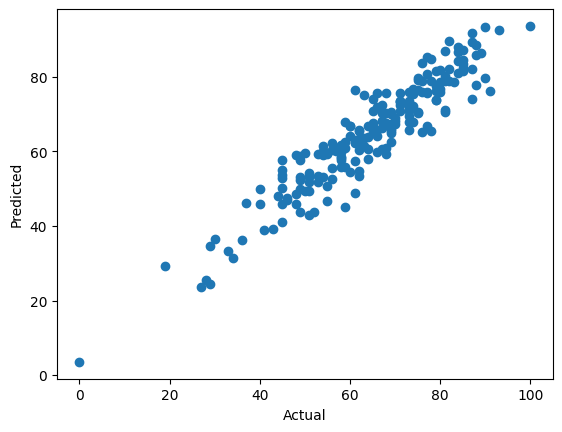

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

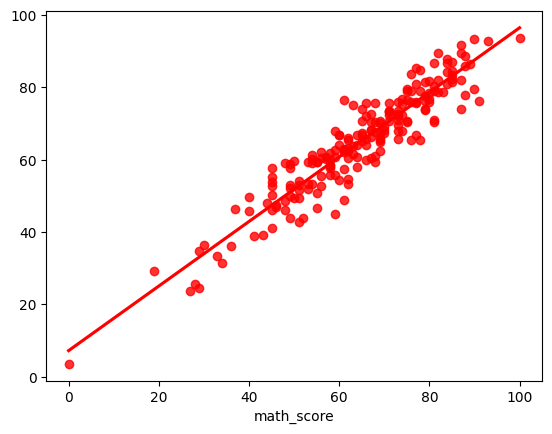

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
